In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Activation,Dense,Dropout,Conv2D,Flatten,MaxPooling2D
from keras.datasets import cifar10
from keras import optimizers
from matplotlib import pyplot as plt
from keras.utils import to_categorical

In [ ]:

(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [ ]:
# X_train = x_train.astype('float32')
# X_test = x_test.astype('float32')
# x_train /= 255.
# x_test /= 255.

num_classes = 10
input_shape = x_train.shape[1:4]
optimizer = optimizers.Adam(learning_rate=0.0003)

In [ ]:

# One-hot encode labels
num_classes = 10
one_hot_y_train = to_categorical(y_train, num_classes)
one_hot_y_test = to_categorical(y_test, num_classes)

(32, 32, 3)


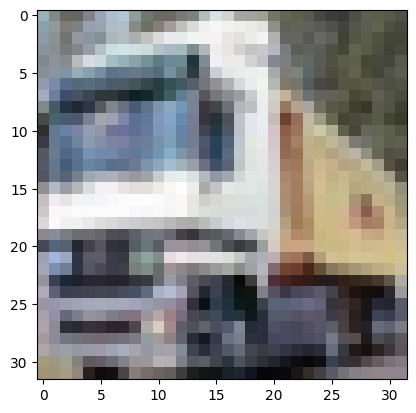

In [ ]:

plt.imshow(x_train[1])
print(x_train[1].shape)

In [ ]:
model = Sequential()
model.add(Conv2D(64,(3,3),activation='relu',input_shape=input_shape,padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
# Add a Dense layer with 10 units and softmax activation for the output
model.add(Dense(10, activation='softmax')) # This line is added to fix the error

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# config optimizer,loss,metrics
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# check model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,719,818 (56.15 MB)

 Trainable params: 14,719,818 (56.15 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.5,patience=2)

In [ ]:
# train
history = model.fit(x=x_train,y=one_hot_y_train,batch_size=128,epochs=3,
                    validation_data=(x_test,one_hot_y_test),callbacks=[reduce_lr])

Epoch 1/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 105ms/step - accuracy: 0.5059 - loss: 1.3418 - val_accuracy: 0.6127 - val_loss: 1.1071 - learning_rate: 3.0000e-04
Epoch 2/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 76ms/step - accuracy: 0.6578 - loss: 0.9611 - val_accuracy: 0.6761 - val_loss: 0.9240 - learning_rate: 3.0000e-04
Epoch 3/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 76ms/step - accuracy: 0.7375 - loss: 0.7444 - val_accuracy: 0.7436 - val_loss: 0.7601 - learning_rate: 3.0000e-04


In [ ]:
print(model.metrics_names)
test_loss, test_acc = model.evaluate(x=x_test,y=one_hot_y_test,batch_size=512)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

['loss', 'compile_metrics']
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 280ms/step - accuracy: 0.7453 - loss: 0.7578
Test Loss: 0.7601
Test Accuracy: 0.7436


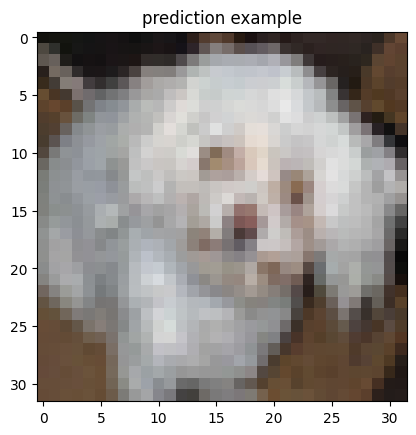

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
predict class: 5
expected class: 5


In [ ]:

plt.imshow(x_test[1000])
plt.title("prediction example")
plt.show()

result = model.predict(x_test[1000:1001]).tolist()
predict = 0
expect = y_test[1000][0]
for i,_ in enumerate(result[0]):
    if result[0][i] > result[0][predict]:
        predict = i
print("predict class:",predict)
print("expected class:",expect)

In [ ]:

model.save("keras-VGG16-cifar10.h5")

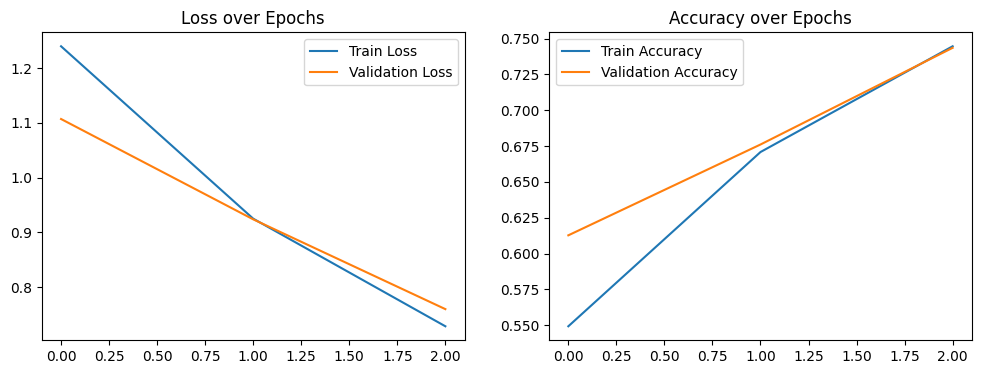

In [ ]:
# plt trainning vs validation accuracy/ loss

def plot_training(history):
  plt.figure(figsize=(12, 4))
  plt.subplot(1, 2, 1)
  plt.plot(history.history['loss'],label = "Train Loss")
  plt.plot(history.history['val_loss'],label = "Validation Loss")
  plt.legend()
  plt.title("Loss over Epochs")

  plt.subplot(1,2,2)
  plt.plot(history.history['accuracy'],label = "Train Accuracy")
  plt.plot(history.history['val_accuracy'],label = "Validation Accuracy")
  plt.legend()
  plt.title("Accuracy over Epochs")
  plt.show()

plot_training(history)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


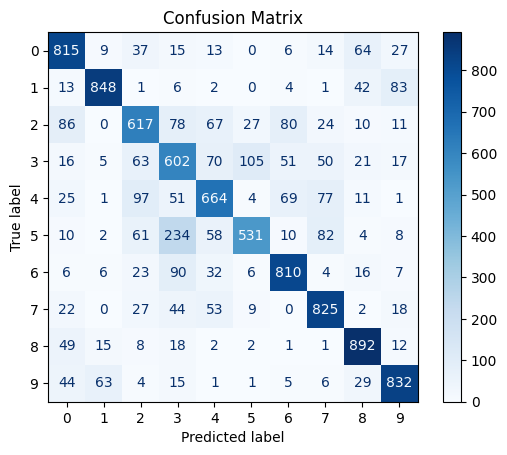

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
y_pred_classes = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap = "Blues")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.optimizers import Adam, RMSprop, SGD

In [ ]:
def create_model(optimizer='adam', dropout_rate = 0.5):
    model = Sequential()
    model.add(Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(32,32,3)))
    model.add(MaxPooling2D((2,2)))
    model.add(Flatten())
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(10,activation='softmax'))
    model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [ ]:
model = KerasClassifier(model=create_model,verbose=0)

video link : https://drive.google.com/file/d/1ChpW9qe1Tlnker6FLFZi75lvnQ9kwDRp/view?usp=sharing

70076646
Yuvarajureddy sirpreddy